# Setup

In [1]:
# import necessary libraries and files
import sys

sys.path.append('../src/data')
from make_dataset import *

sys.path.append('../src/models')
from lstm_model import *

## Data Preprocessing

In [2]:
filepath1 = '../data/raw/user1/'
df1, schema1, time_df1 = get_data(filepath1, read_from_notebook=True, out_schema=True)
all_time_df1 = save_time_measurement(time_df1, filepath1, saved=False)

apps1 = lstm_data(filepath1)

filepath2 = '../data/raw/user2/'
apps2 = lstm_data(filepath2)

## Bidirectional LSTM with Lookback Feature Engineering

- __Problem Statement__: Predict the duration a user spends on an app within an hour, given the past time-series data. 

In [ ]:
model, out_df, X_train, X_test, y_train, y_test = bi_lstm(apps1, app_name='chrome.exe', at_most=1)

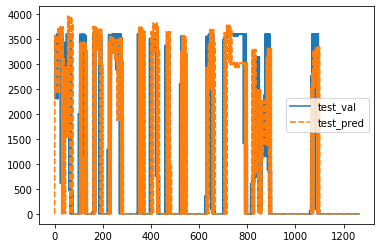

In [220]:
out_df = predict(model, X_test, y_test, time_step=5, n_features=1)

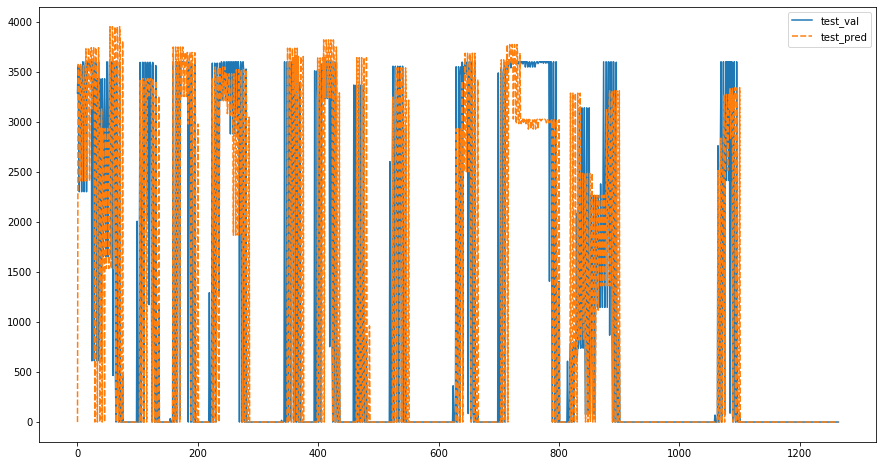

In [224]:
plt.figure(figsize=(15,8))
sns.lineplot(out_df[['test_val', 'test_pred']])

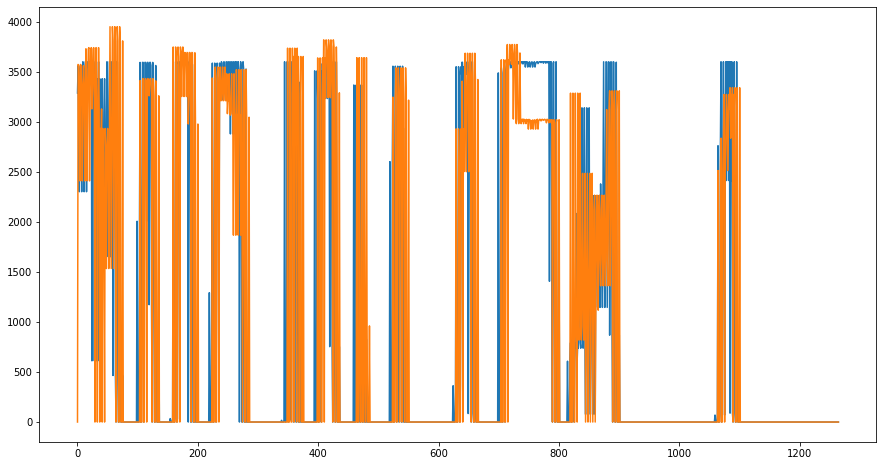

In [233]:
plt.figure(figsize=(15,8))
plt.plot(out_df['test_val'])
plt.plot(out_df['test_pred'])

In [225]:
test_acc(out_df, at_most = 1)

RMSE = 938.3587213544401
ACC = 60.47430830039525


In [230]:
test_acc(out_df, at_most = 15)

RMSE = 938.3587213544401
ACC = 61.42292490118577


In [223]:
test_acc(out_df, at_most = 180)

RMSE = 938.3587213544401
ACC = 70.51383399209486


In [229]:
test_acc(out_df, at_most = 300)

RMSE = 938.3587213544401
ACC = 73.67588932806323


## Vanilla RNN & Stacked LSTM
__Problem Statement__: Predict the total amount of time a particular user spends using a particular app on any given day

Epoch 1/10
24/24 [==============================] - 2s 5ms/step - loss: 0.2257 - accuracy: 0.7262
Epoch 2/10
24/24 [==============================] - 0s 5ms/step - loss: 0.2126 - accuracy: 0.7262
Epoch 3/10
24/24 [==============================] - 0s 5ms/step - loss: 0.2126 - accuracy: 0.7262
Epoch 4/10
24/24 [==============================] - 0s 5ms/step - loss: 0.2126 - accuracy: 0.7262
Epoch 5/10
24/24 [==============================] - 0s 5ms/step - loss: 0.2126 - accuracy: 0.7262
Epoch 6/10
24/24 [==============================] - 0s 6ms/step - loss: 0.2126 - accuracy: 0.7262
Epoch 7/10
24/24 [==============================] - 0s 6ms/step - loss: 0.2126 - accuracy: 0.7262
Epoch 8/10
24/24 [==============================] - 0s 5ms/step - loss: 0.2126 - accuracy: 0.7262
Epoch 9/10
24/24 [==============================] - 0s 5ms/step - loss: 0.2126 - accuracy: 0.7262
Epoch 10/10
24/24 [==============================] - 0s 3ms/step


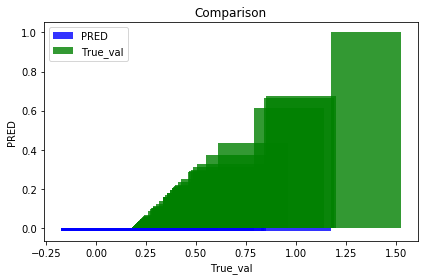

In [7]:
### Vanilla RNN ###
filepath = '../data/out/enumerated_app_time.csv'
df, X, y = load_data(filepath, model_type="no enum")
df = vanilla_rnn(df, X, y)
pred_vs_true(df)
binned_pred, binned_true = binning(df)
tp, tn, fp, fn, accuracy = calculate_metrics(binned_true, binned_pred)

In [8]:
print('True Positive:', tp, '\nTrue Negative:', tn, '\nFalse Positive:', fp, '\nFalse Negative:', fn, '\nAccuracy:', accuracy*100)

True Positive: 691 
True Negative: 0 
False Positive: 65 
False Negative: 0 
Accuracy: 91.4021164021164


24/24 [==============================] - 1s 2ms/step


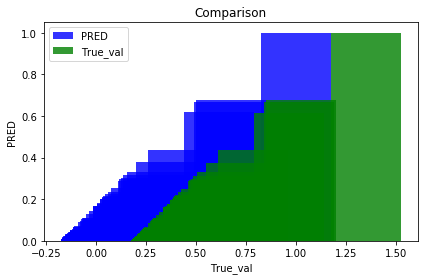

In [9]:
### Stacked LSTM ###
filepath = '../data/out/enumerated_app_time.csv'
df, X, y = load_data(filepath, model_type="enum")
df = enumerated_lstm(df, X, y)
pred_vs_true(df)
binned_pred, binned_true = binning(df)
tp, tn, fp, fn, accuracy = calculate_metrics(binned_true, binned_pred)

In [10]:
print('True Positive =', tp, '\nTrue Negative =', tn, '\nFalse Positive =', fp, '\nFalse Negative =', fn)
print('Accuracy =', accuracy)

True Positive = 669 
True Negative = 63 
False Positive = 2 
False Negative = 22
Accuracy = 0.9682539682539683
